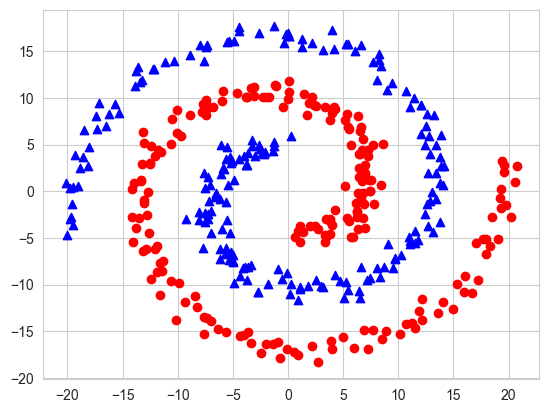

In [22]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import seaborn as sns


N = 200
theta = np.linspace(-1.3, 6.5, 200)

r_a = 2*theta + pi + 4
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N,2) * 0.8

r_b = -2*theta - pi - 4
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N,2) * 0.8

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("train.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1], c='red')
plt.scatter(x_b[:,0],x_b[:,1], c='blue', marker='^')
plt.show()

In [23]:
df = pd.read_csv('train.csv')
df

,x,y,label
0,6.69116,1.08151,0.0
1,5.67696,4.97442,0.0
2,-7.27243,-2.93437,1.0
3,6.11149,15.01342,1.0
4,-7.65329,-13.46625,0.0
...,...,...,...
395,-5.30415,-4.48826,1.0
396,20.23068,-2.71700,0.0
397,17.23530,-9.53913,0.0
398,-8.87615,8.18673,0.0


In [24]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
def plot_confusion_matrix(cm, classes, l,
                          normalize=False,
                          cmap='gray_r',
                          linecolor='k'):

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title('Confusion Matrix\nlambda = ' + str(l))
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    plt.show()

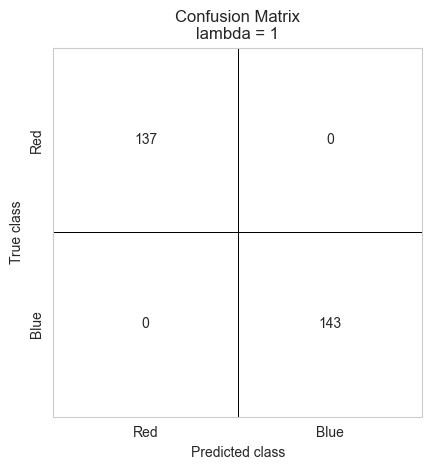

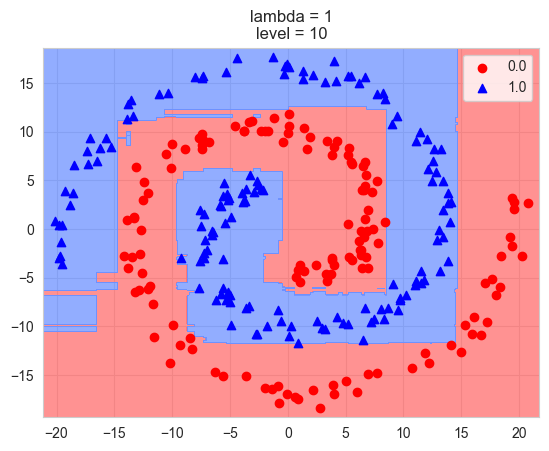

Accuracy:100.0%


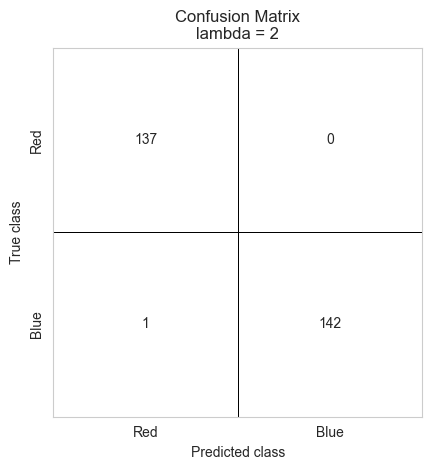

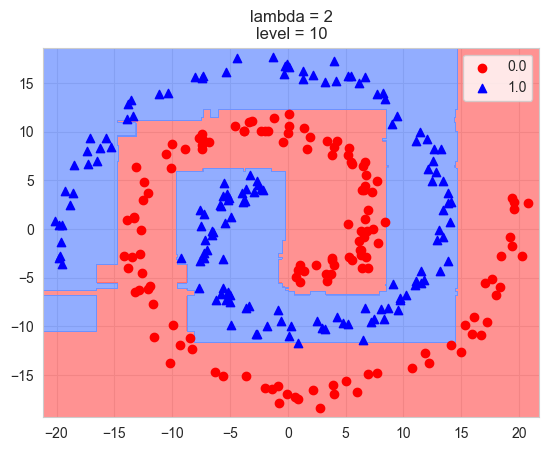

Accuracy:99.64285714285714%


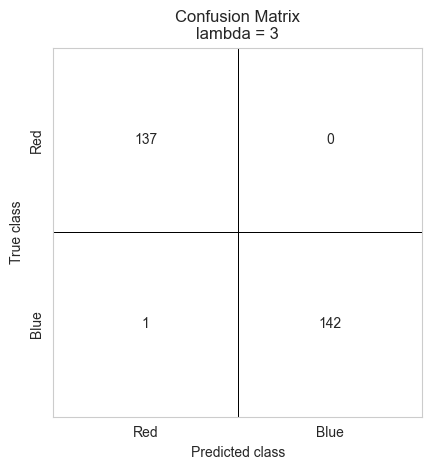

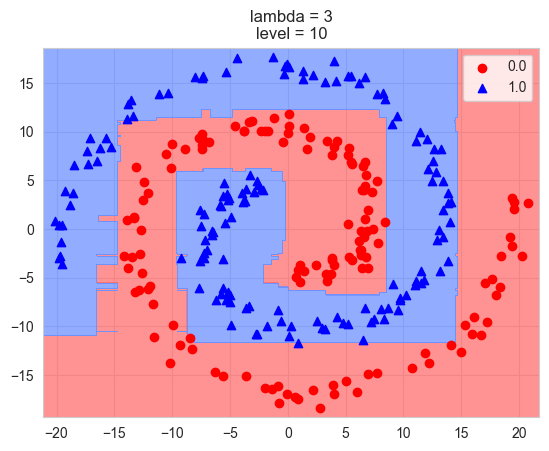

Accuracy:99.64285714285714%


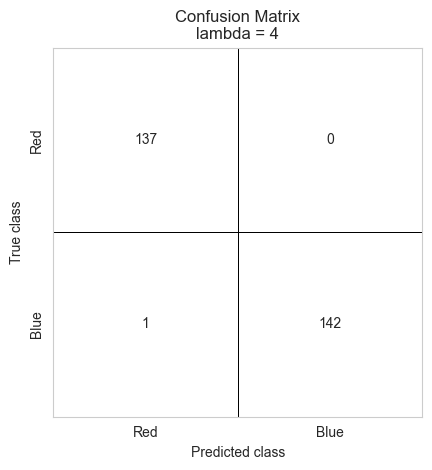

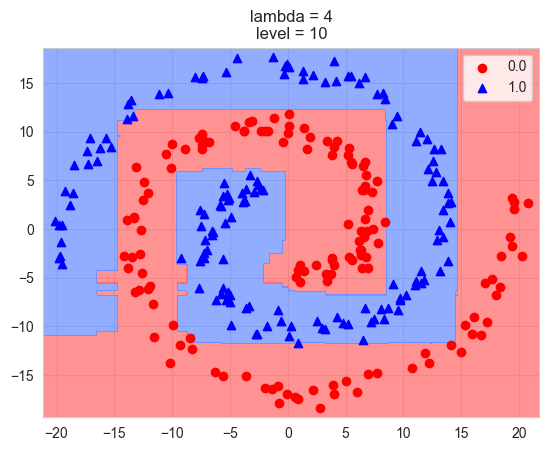

Accuracy:99.64285714285714%


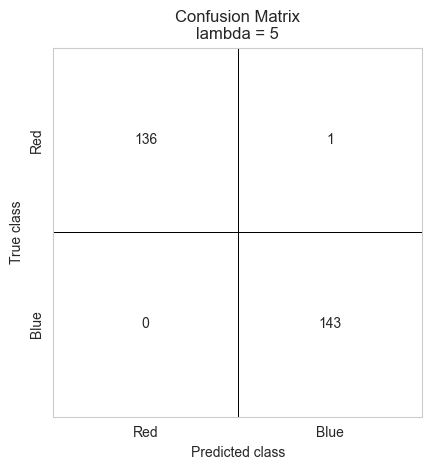

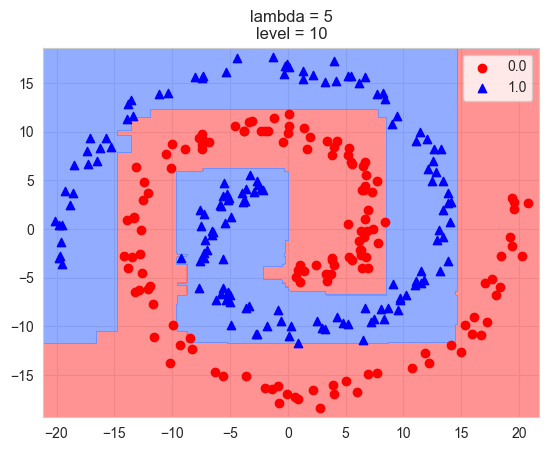

Accuracy:99.64285714285714%


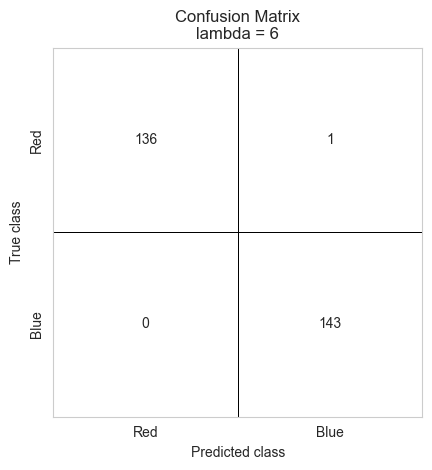

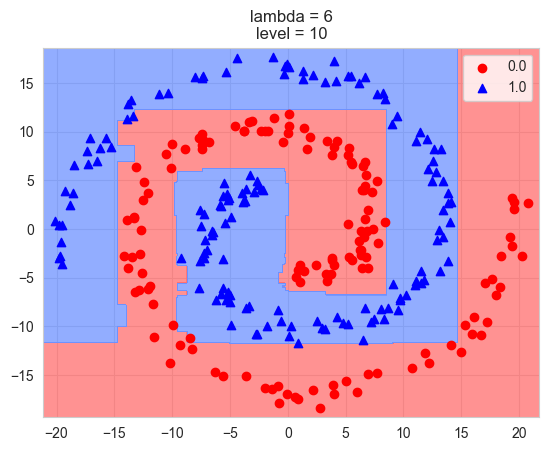

Accuracy:99.64285714285714%


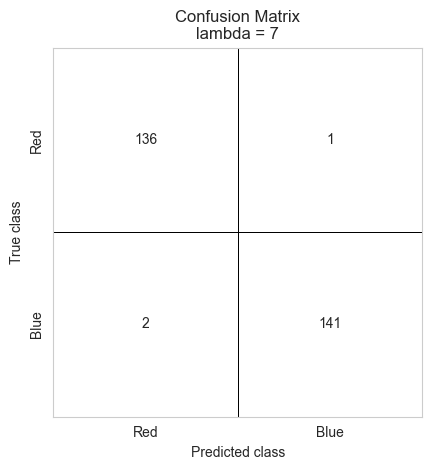

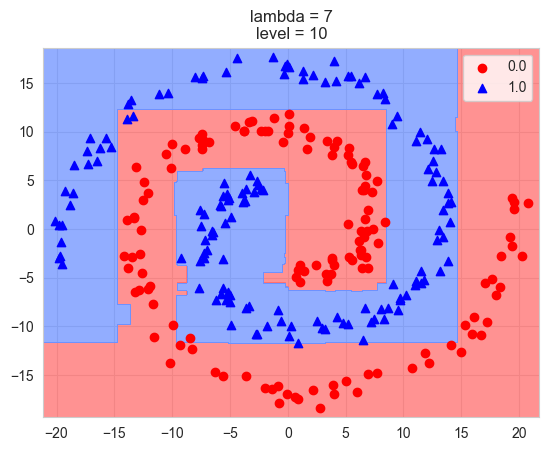

Accuracy:98.92857142857143%


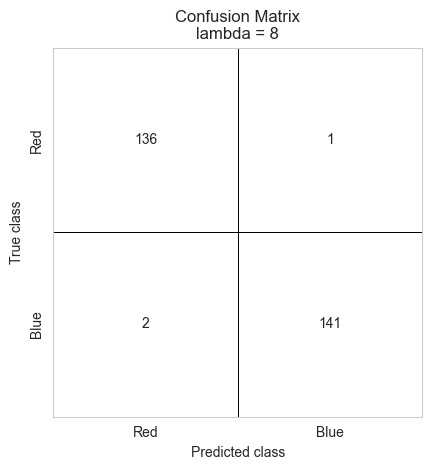

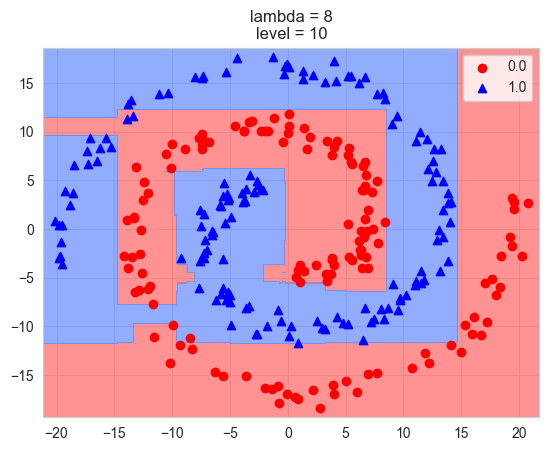

Accuracy:98.92857142857143%


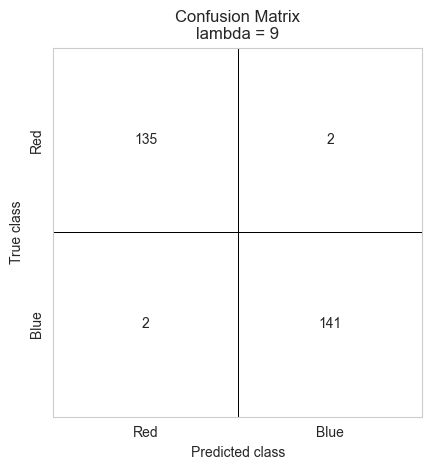

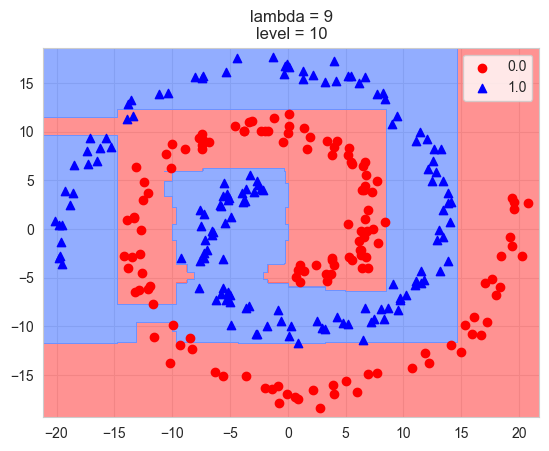

Accuracy:98.57142857142858%


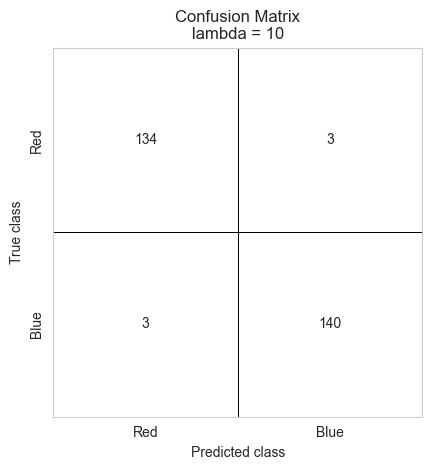

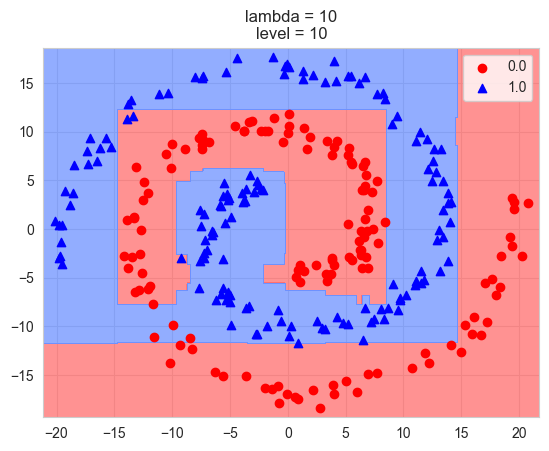

Accuracy:97.85714285714285%


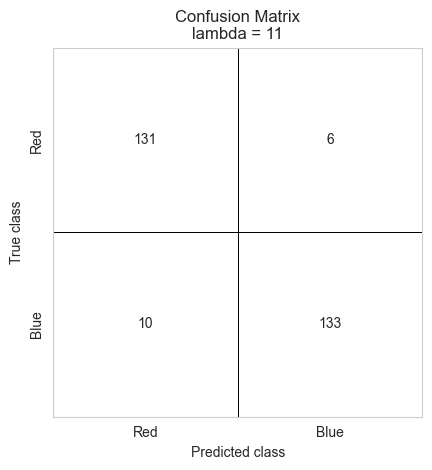

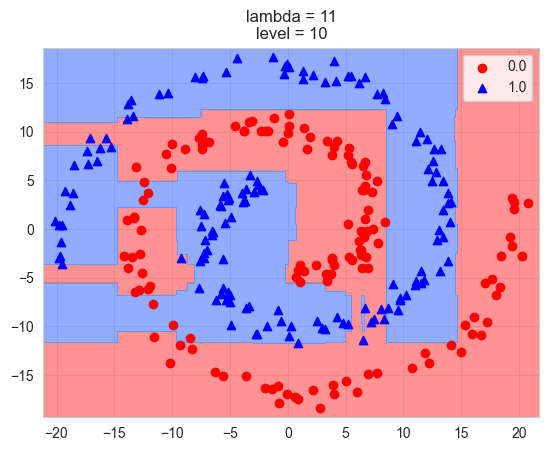

Accuracy:94.28571428571428%


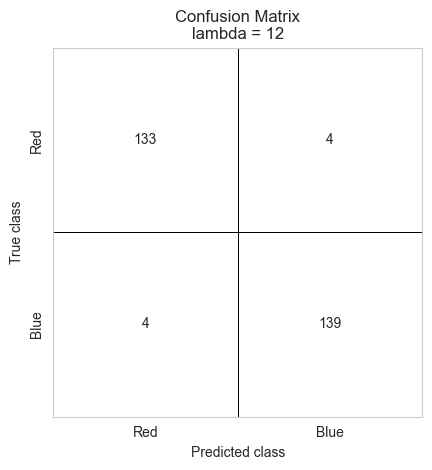

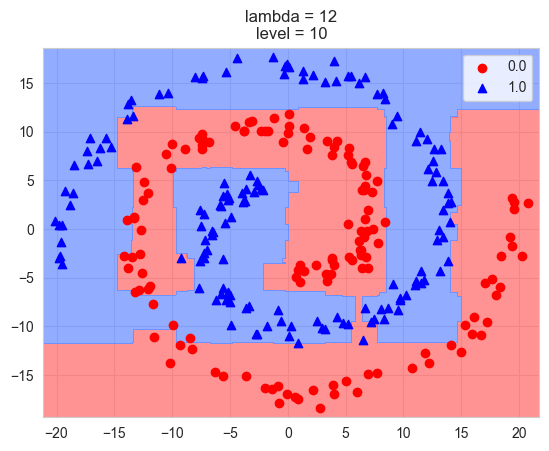

Accuracy:97.14285714285714%


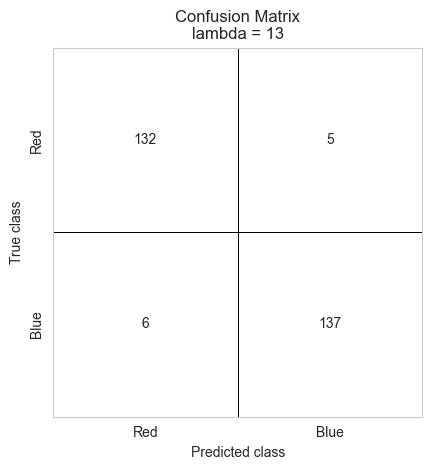

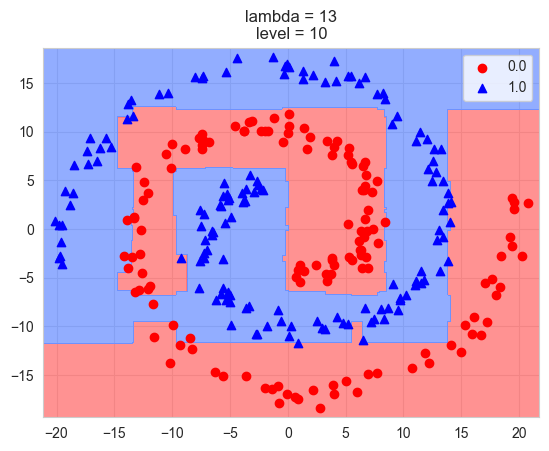

Accuracy:96.07142857142857%


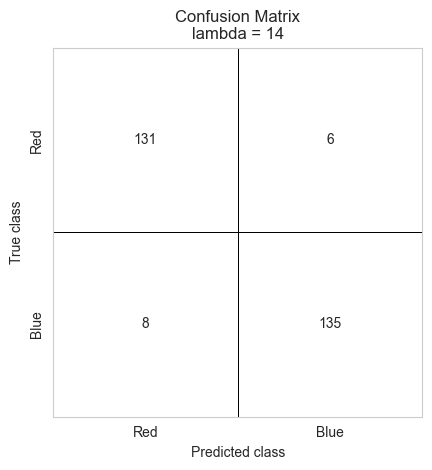

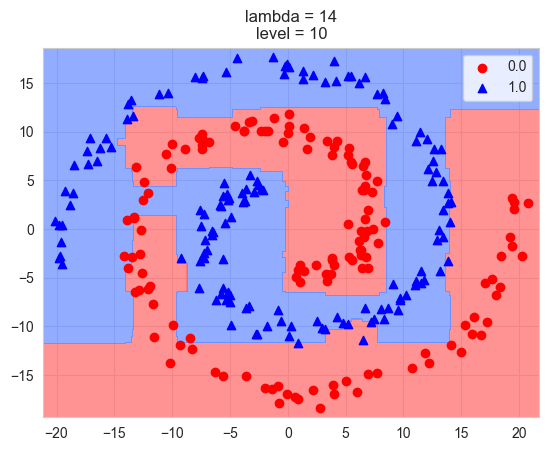

Accuracy:95.0%


In [27]:
for l in range(1, 15):
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=10, min_samples_leaf=l)
    model.fit(X_train, y_train)
    
    test_predict = model.predict(X_train)
    
    conf_mat = confusion_matrix(y_train, test_predict)
    plot_confusion_matrix(conf_mat, ['Red', 'Blue'], l)
    
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.contourf(X1,X2,predictions, alpha = 0.75, cmap = ListedColormap(('#ff6e6e', '#6e92ff')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    markers = ["o", "^"]
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], marker=markers[i],
                    c = ListedColormap(('red', 'blue'))(i), label = j)
    
    plt.title("lambda = " + str(l) + "\nlevel = 10")
    plt.legend()
    plt.show()
    
    print("Accuracy:" + str(accuracy_score(y_train, test_predict) * 100) + "%")

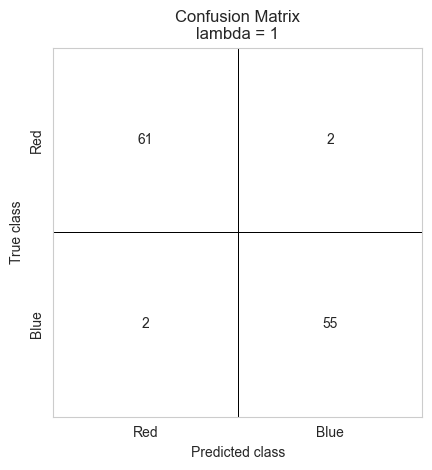

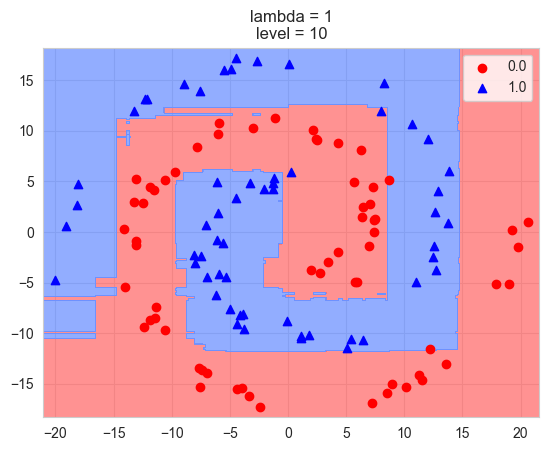

Accuracy:96.66666666666667%


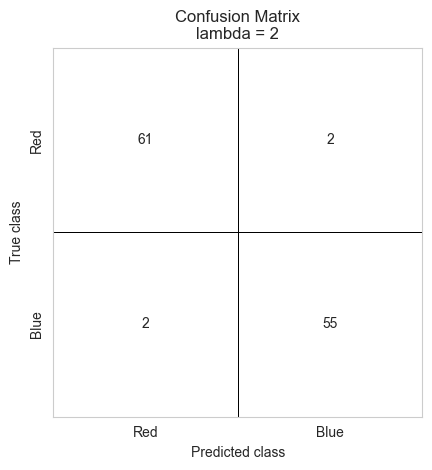

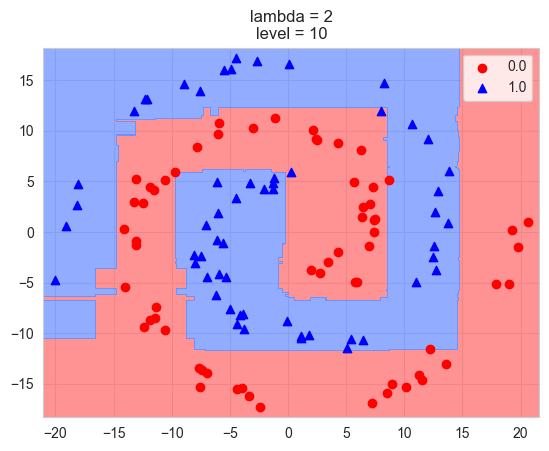

Accuracy:96.66666666666667%


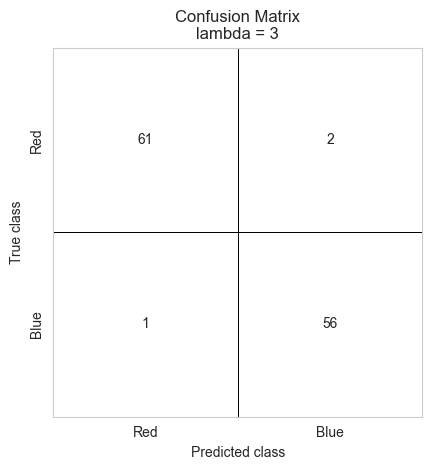

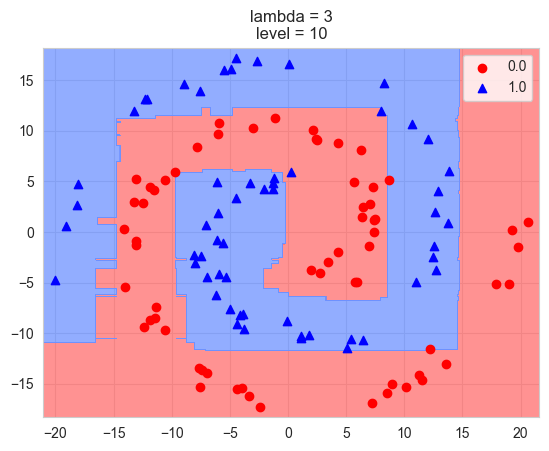

Accuracy:97.5%


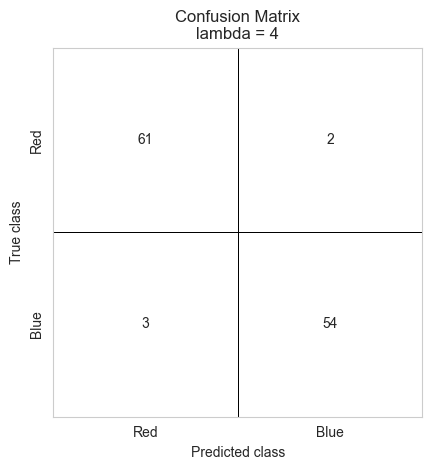

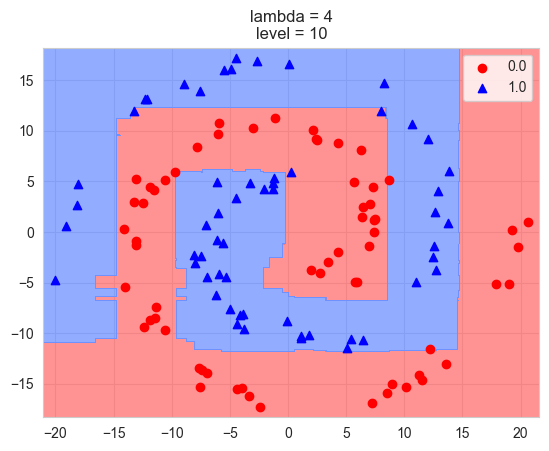

Accuracy:95.83333333333334%


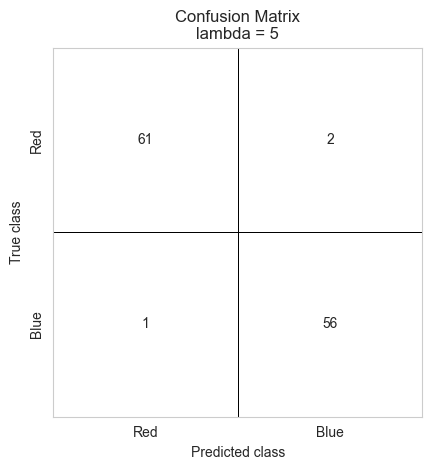

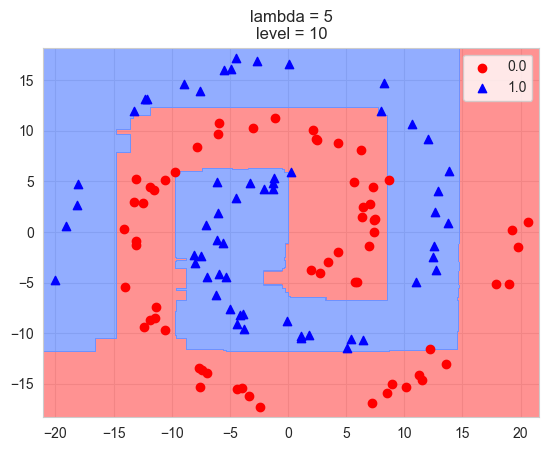

Accuracy:97.5%


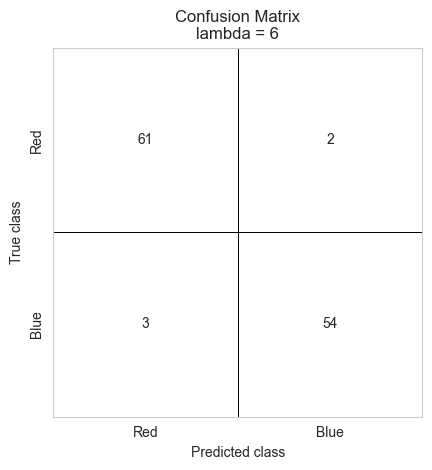

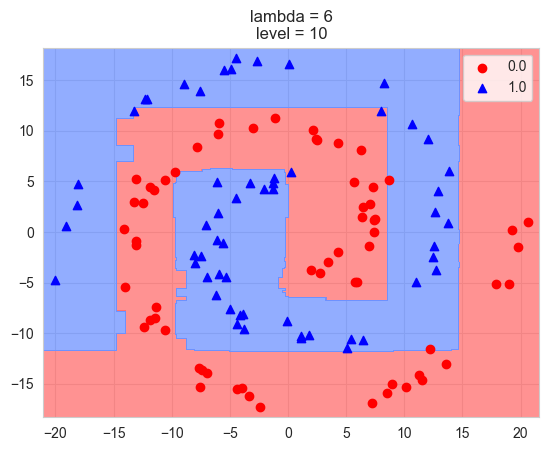

Accuracy:95.83333333333334%


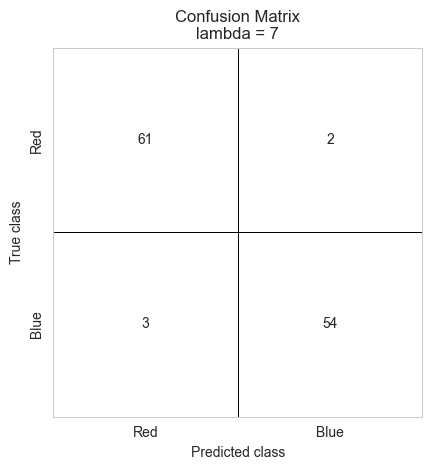

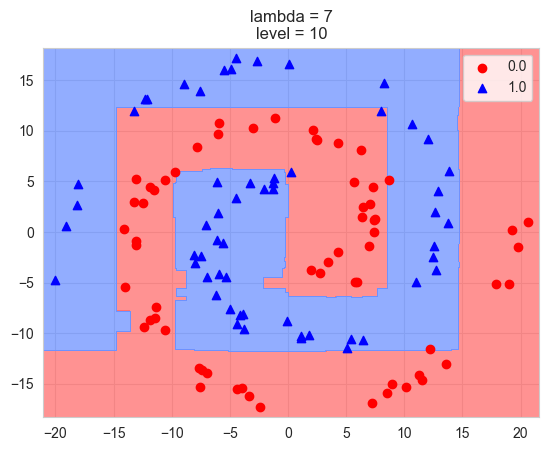

Accuracy:95.83333333333334%


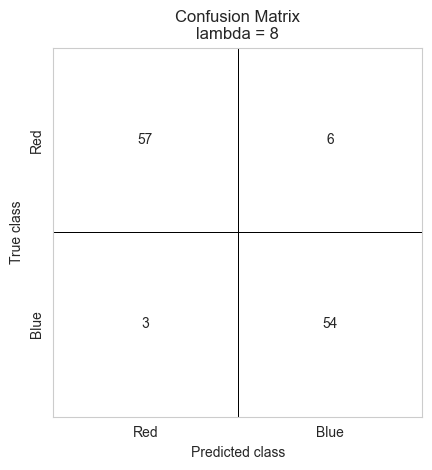

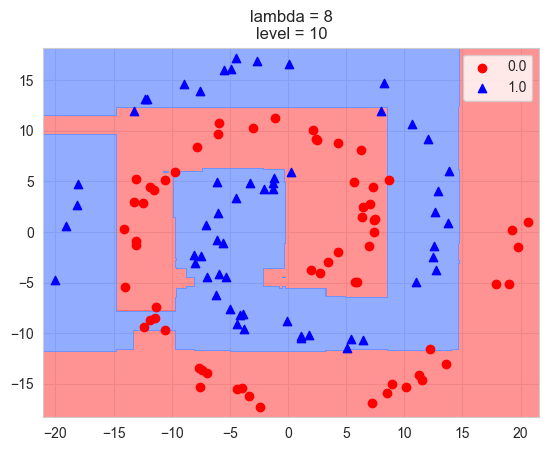

Accuracy:92.5%


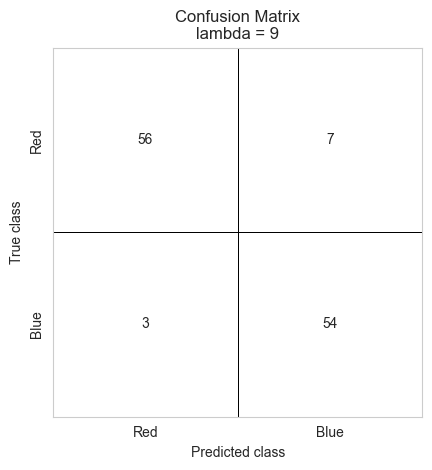

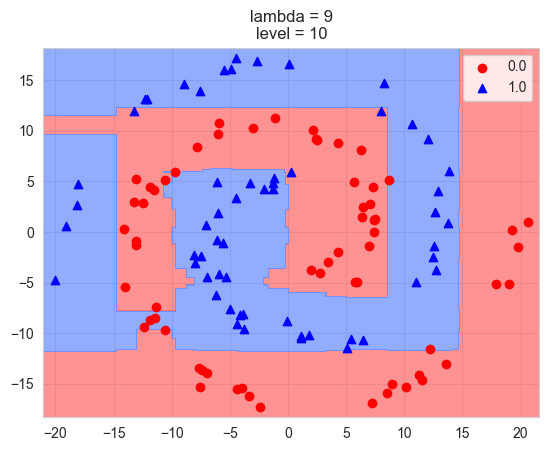

Accuracy:91.66666666666666%


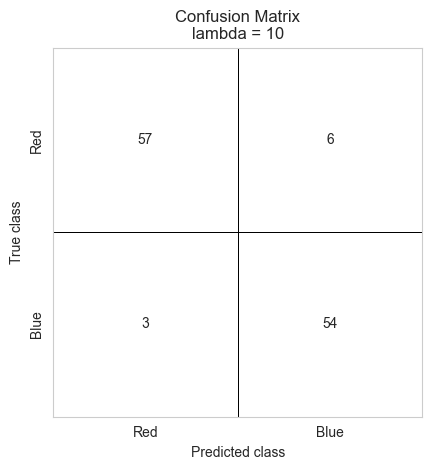

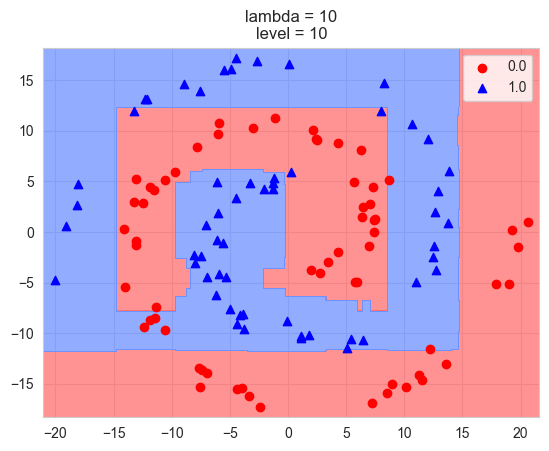

Accuracy:92.5%


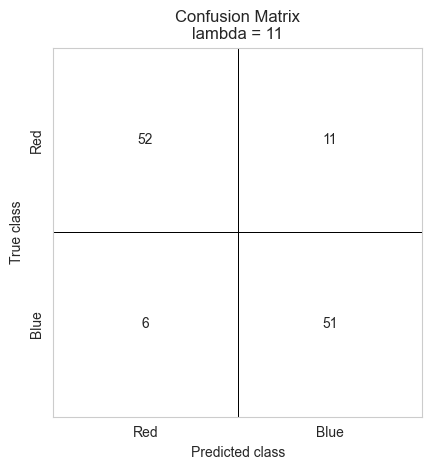

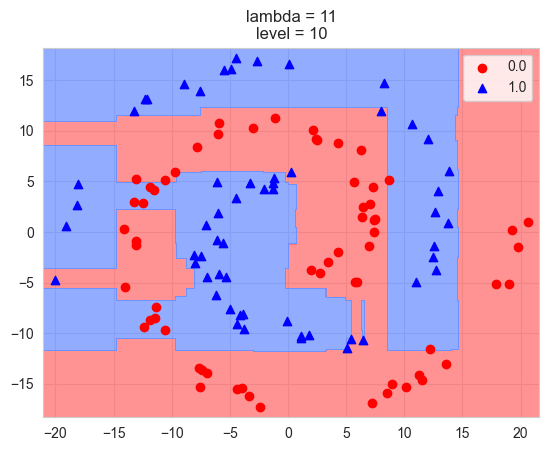

Accuracy:85.83333333333333%


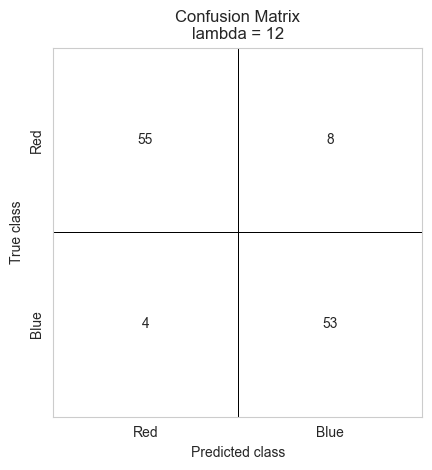

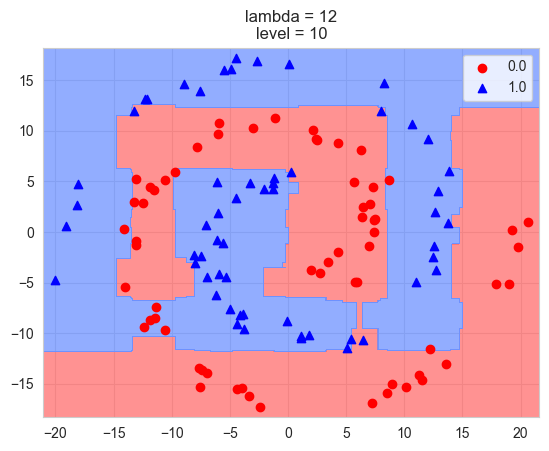

Accuracy:90.0%


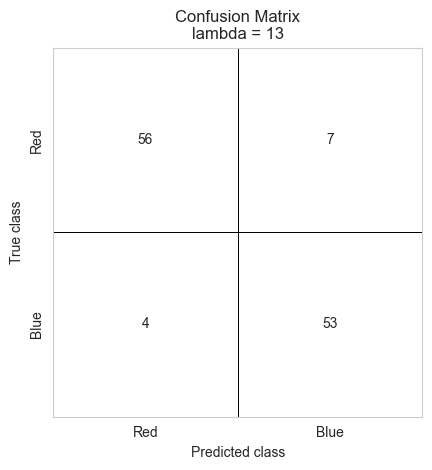

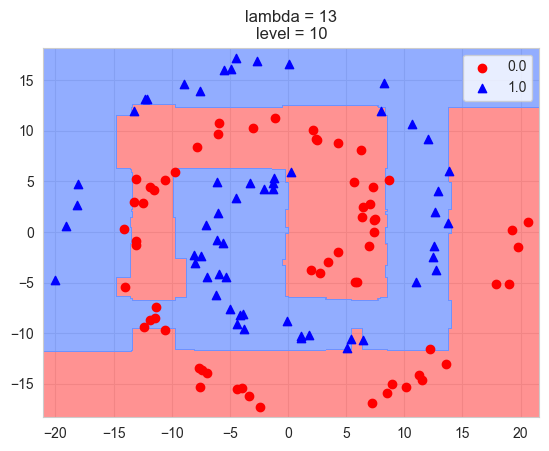

Accuracy:90.83333333333333%


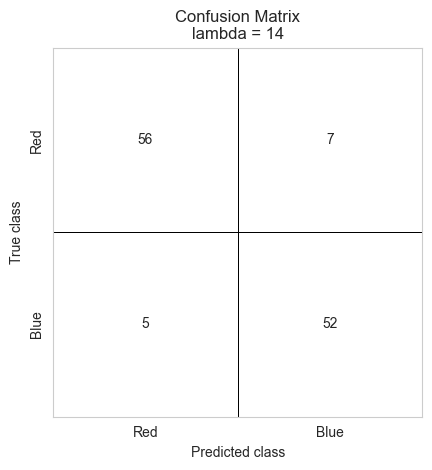

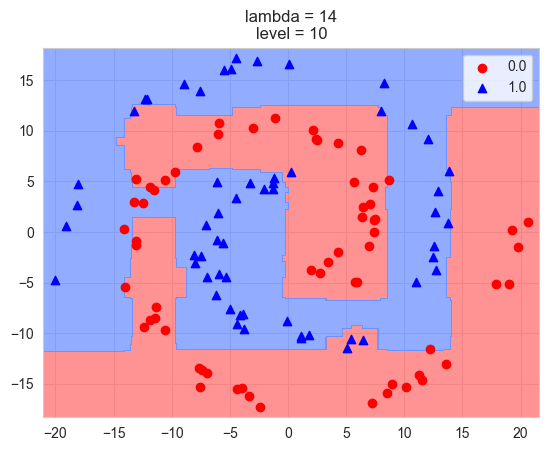

Accuracy:90.0%


In [28]:
for l in range(1, 15):
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=10, min_samples_leaf=l)
    model.fit(X_train, y_train)
    
    test_predict = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, test_predict)
    plot_confusion_matrix(conf_mat, ['Red', 'Blue'], l)
    
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.contourf(X1,X2,predictions, alpha = 0.75, cmap = ListedColormap(('#ff6e6e', '#6e92ff')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    markers = ["o", "^"]
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], marker=markers[i],
                    c = ListedColormap(('red', 'blue'))(i), label = j)
    
    plt.title("lambda = " + str(l) + "\nlevel = 10")
    plt.legend()
    plt.show()
    
    print("Accuracy:" + str(accuracy_score(y_test, test_predict) * 100) + "%")